In [14]:
# Initial Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr

In [15]:
# Import the data

# Define the 'get_data' function
def get_data(cryptos, start, end):
    cryptoData = pdr.get_data_yahoo(cryptos, start, end) # grabs cryptocurrency data from Yahoo finance
    cryptoData = cryptoData["Close"] # focus on the 'Close' prices column
    returns = cryptoData.pct_change() # compute daily return
    meanReturns = returns.mean() # compute mean returns
    covMatrix = returns.cov() # compute covariance matrix
    return meanReturns, covMatrix

# Identify the Cryptocurrencies for the Portfolio
cryptoList = ["ADA", "SOL", "BNB", "XRP", "ETH", "BTC"]
cryptos = [crypto + "-USD" for crypto in cryptoList] # adds string '-USD' which correlates to ticker in Yahoo Finance
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days = 365*10) # defines length of time for which price history is fetched

In [16]:
# Check program is grabbing data correctly

meanReturns, covMatrix = get_data(cryptos, startDate, endDate)

print(meanReturns)

Symbols
ADA-USD    0.003849
SOL-USD    0.006844
BNB-USD    0.004583
XRP-USD    0.002517
ETH-USD    0.002195
BTC-USD    0.002031
dtype: float64


In [9]:
# Define portfolio weights

weights = 0.16, 0.16, 0.16, 0.16, 0.16, 0.16 # 6 weights as 6 cryptocurrencies have been chosen
weights /= np.sum(weights) # ensure sum of weights is equal to 1

In [17]:
# Monte Carlo Method

mc_sims = 500 # number of simulations
T = 365*5 # timeframe in days

meanM = np.full(shape = (T, len(weights)), fill_value = meanReturns) # sets up mean returns matrix
meanM = meanM.T # transpose of the matrix, in order to compute the below

portfolio_sims = np.full(shape = (T, mc_sims), fill_value = 0.0) # array in which to store the information

initialPortfolio = 1000000 # initial portfolio value ($)

for m in range (0, mc_sims): # monte Carlo Simulation Loops
    Z = np.random.normal(size = (T, len(weights))) # sample of uncorrelated variables from normal distribution
    L = np.linalg.cholesky(covMatrix) # correlate variables with covariance matrix
    dailyReturns = meanM + np.inner(L, Z) # formula for daily returns
    # record portfolio daily returns and then accumulate them accross days
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T) + 1)*initialPortfolio

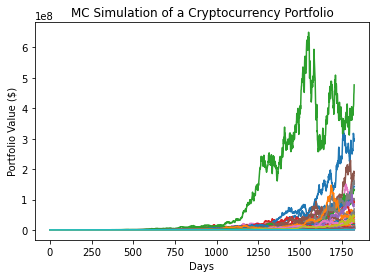

In [18]:
plt.plot(portfolio_sims) # plot the portfolio simulations
plt.ylabel("Portfolio Value ($)") # designate y label of graph
plt.xlabel("Days") # designate x label of graph
plt.title("MC Simulation of a Cryptocurrency Portfolio") # graph title
plt.show() # call the graph